<a href="https://colab.research.google.com/github/jantic/DeOldify/blob/master/VideoColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from os import path
import torch

#◢ Git clone and install DeOldify

In [2]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1921 (delta 5), reused 15 (delta 3), pack-reused 1898
Receiving objects: 100% (1921/1921), 69.28 MiB | 26.06 MiB/s, done.
Resolving deltas: 100% (828/828), done.


In [3]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 215kB 10.1MB/s 
     |████████████████████████████████| 133kB 74.3MB/s 
     |████████████████████████████████| 1.8MB 68.1MB/s 
     |████████████████████████████████| 6.4MB 56.3MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6085 sha256=e5cb0e8347d96b52ab2d3943a0578b0c4b3f430c1054ebb13c9b0e7fb485842d
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg
  Found existing installation: fastai 1.0.59
    Uninstalling fastai-1.0.59:
      Successfully uninstalled fastai-1.0.59
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [0]:
import fastai
from deoldify.visualize import *
from pathlib import Path
torch.backends.cudnn.benchmark=True

In [6]:
!mkdir 'models'
!wget https://www.dropbox.com/s/336vn9y4qwyg9yz/ColorizeVideo_gen.pth?dl=0 -O ./models/ColorizeVideo_gen.pth

--2019-12-11 05:01:33--  https://www.dropbox.com/s/336vn9y4qwyg9yz/ColorizeVideo_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/336vn9y4qwyg9yz/ColorizeVideo_gen.pth [following]
--2019-12-11 05:01:33--  https://www.dropbox.com/s/raw/336vn9y4qwyg9yz/ColorizeVideo_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2aaf91935929103dcc792f27fb.dl.dropboxusercontent.com/cd/0/inline/AuBcuR4eD_S-xvn9eB5bN-mQijWQ56Uvz7u1NaDcls5lnJOv8zZVrjBrT4G_gUrqLTWMr8TZ-5wSoz0JALJ05hMNhOCCvOCbeMHizR2QYOJM5Q/file# [following]
--2019-12-11 05:01:34--  https://uc2aaf91935929103dcc792f27fb.dl.dropboxusercontent.com/cd/0/inline/AuBcuR4eD_S-xvn9eB5bN-mQijWQ56Uvz7u1NaDcls5lnJOv8zZVrjBrT4G_gUrqLTWMr8TZ-5wSoz0JALJ05hMNhOCCvOCbeMHi

In [7]:
colorizer = get_video_colorizer()

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:03<00:00, 48.9MB/s]
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It

#◢ Colorize!!

In [8]:
source_url = 'https://www.youtube.com/watch?v=H19jByxrqlw' #@param {type:"string"}
render_factor = 21  #@param {type: "slider", min: 5, max: 44}

if source_url is not None and source_url !='':
    video_path = colorizer.colorize_from_url(source_url, 'video.mp4', render_factor)
    show_video_in_notebook(video_path)
else:
    print('Provide a video url and try again.')

[youtube] H19jByxrqlw: Downloading webpage
[youtube] H19jByxrqlw: Downloading video info webpage
[youtube] H19jByxrqlw: Downloading js player vflDT4YKf
[youtube] H19jByxrqlw: Downloading js player vflDT4YKf
[download] Destination: video/source/video.f136.mp4
[download] 100% of 15.30MiB in 00:00
[download] Destination: video/source/video.mp4.f140
[download] 100% of 2.06MiB in 00:00
[ffmpeg] Merging formats into "video/source/video.mp4"
Deleting original file video/source/video.f136.mp4 (pass -k to keep)
Deleting original file video/source/video.mp4.f140 (pass -k to keep)


Video created here: video/result/video.mp4


## We could see how render factor influences the vedio

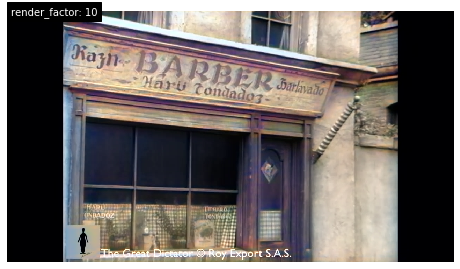

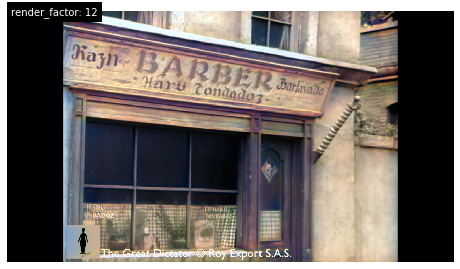

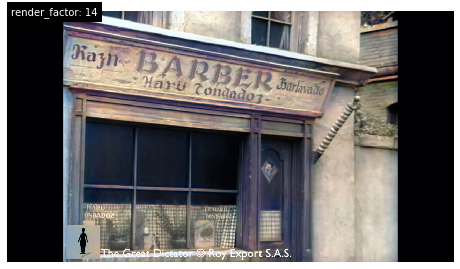

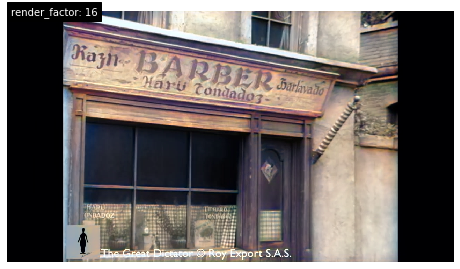

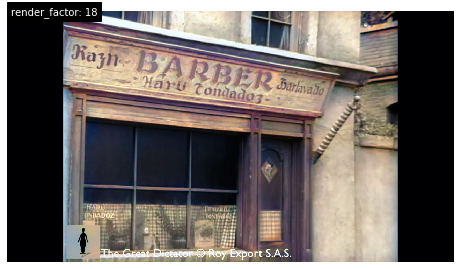

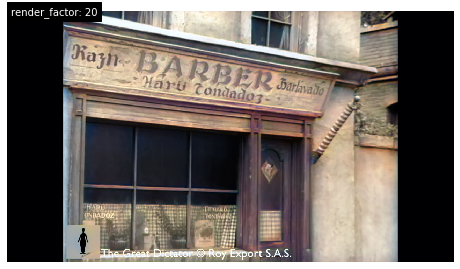

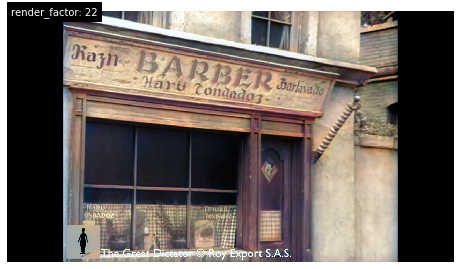

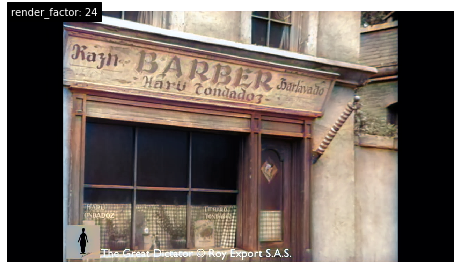

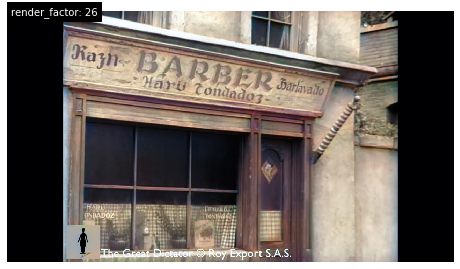

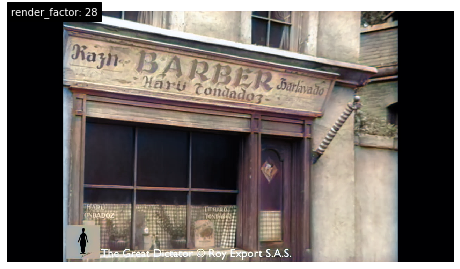

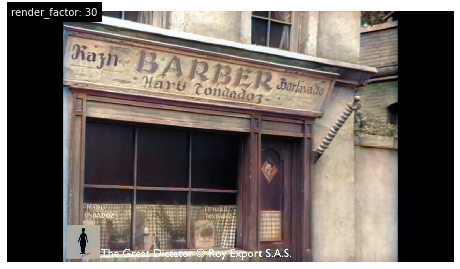

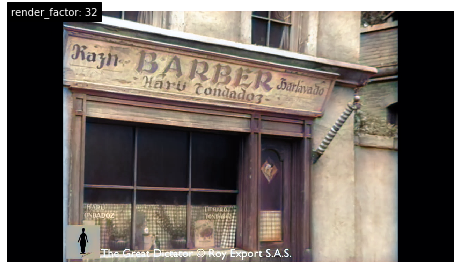

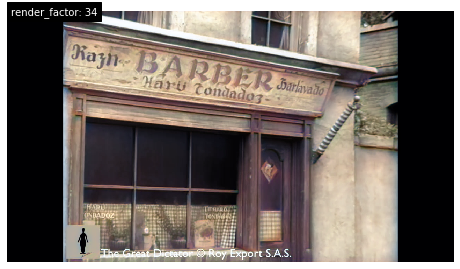

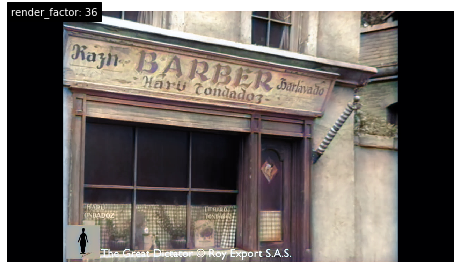

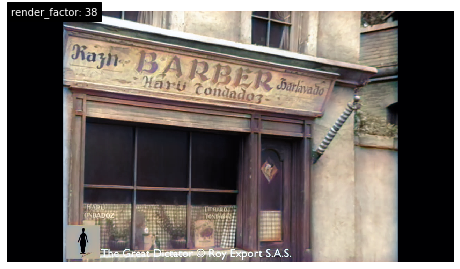

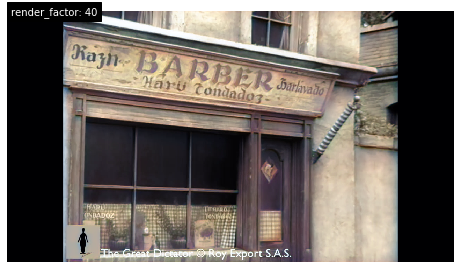

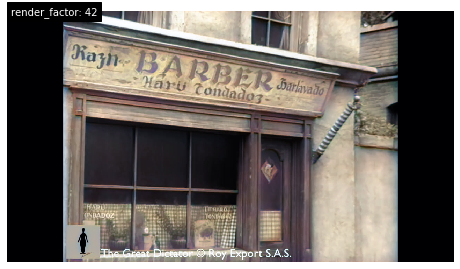

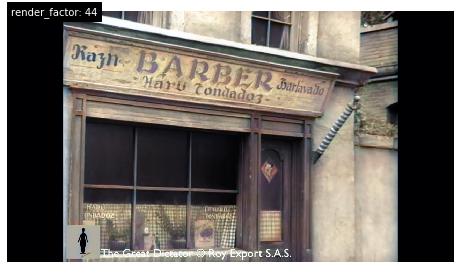

In [9]:
for i in range(10,45,2):
    colorizer.vis.plot_transformed_image('video/bwframes/video/00001.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))